# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = study_results.merge(mouse_metadata, on='Mouse ID', how='inner')

# Display the data table for preview
complete_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
complete_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = complete_data.loc[complete_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
complete_data[complete_data['Mouse ID'] == duplicate_mouse_ids[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df_filtered = df[df['Age'] >= 25]

complete_data = complete_data[complete_data['Mouse ID'] != duplicate_mouse_ids[0]]
complete_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
complete_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics_mean = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_statistics_median = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_statistics_variance = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_statistics_standardDev = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_statistics_SEM = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statisticsValues = {
    'Mean Tumor Volume':summary_statistics_mean,
    'Median Tumor Volume':summary_statistics_median,
    'Tumor Volume Variance':summary_statistics_variance,
    'Tumor Volume Std. Dev.':summary_statistics_standardDev,
    'Tumor Volume Std. Err.':summary_statistics_SEM}

summary_statistics = pd.DataFrame(summary_statisticsValues)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# THE METHOD SELECTED IS THE ONE USED ON THE LINE ABOVE

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

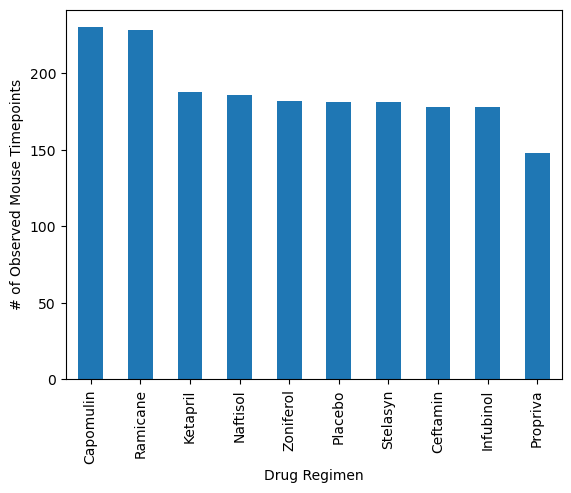

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

(
    complete_data
    .groupby('Drug Regimen')['Mouse ID']
    .count()
    .sort_values(ascending=False)
    .plot(kind = 'bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')
    
)

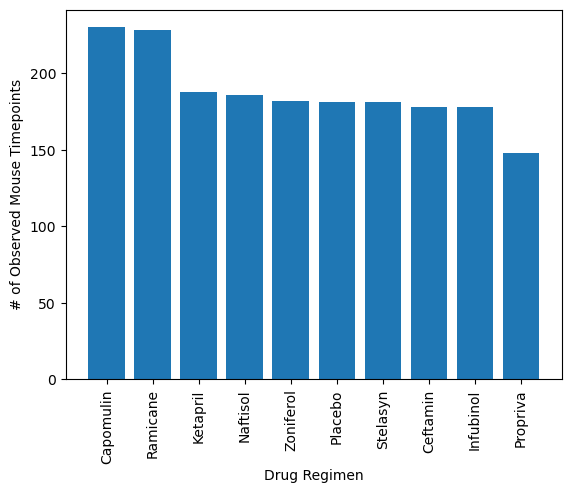

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

summary_data = complete_data.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
labels = summary_data.index

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.bar(labels, summary_data)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='Sex'>

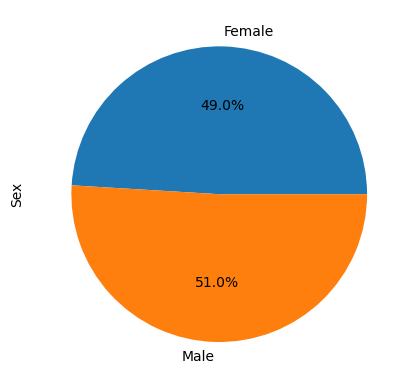

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

(
    complete_data
    .groupby('Sex')['Mouse ID']
    .count()
    .plot(kind = 'pie', ylabel='Sex', autopct='%1.1F%%')
    
)

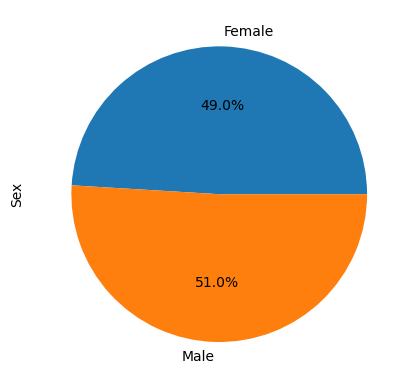

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = complete_data.groupby('Sex')['Mouse ID'].count()
labels = sizes.index


plt.pie(sizes, labels=labels, autopct='%1.1F%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

This section is to see if method 1 works

In [167]:
# Get subset where Drug Regiment = needed values
DataCapomulin = complete_data[complete_data['Drug Regimen'] == 'Capomulin']
DataRamicane = complete_data[complete_data['Drug Regimen'] == 'Ramicane']
DataInfubinol = complete_data[complete_data['Drug Regimen'] == 'Infubinol']
DataCeftamin = complete_data[complete_data['Drug Regimen'] == 'Ceftamin']

DataCapomulin2 = DataCapomulin[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
DataRamicane2 = DataRamicane[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
DataInfubinol2 = DataInfubinol[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]
DataCeftamin2 = DataCeftamin[['Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)']]



The lower quartile is: 37.685932865,
The upper quatile is: 45.0,
The IQR is: 7.314067135000002,
The lower bound is: 26.714832162499995,
The upper bound is: 55.9711007025




<AxesSubplot:>

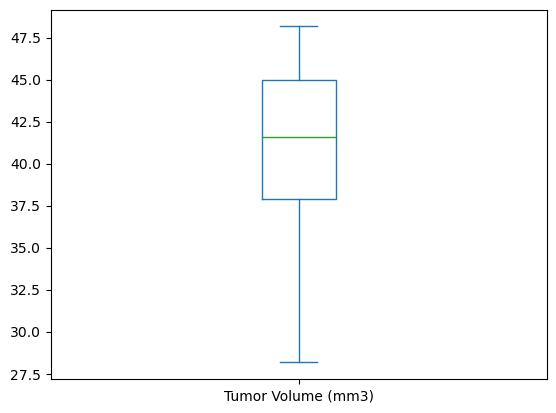

In [168]:
# Calculate upper and lower bounds CAPOMULIN
stats_Capomulin = DataCapomulin2['Tumor Volume (mm3)'].describe()
stats_CapomulinQ1 = stats_Capomulin['25%']
stats_CapomulinQ3 = stats_Capomulin['75%']
stats_CapomulinIQR = stats_CapomulinQ3 - stats_CapomulinQ1
stats_CapomulinLowerBound = stats_CapomulinQ1 - (stats_CapomulinIQR*1.5)
stats_CapomulinUpperBound = stats_CapomulinQ3 + (stats_CapomulinIQR*1.5)

print(f'''

The lower quartile is: {stats_CapomulinQ1},
The upper quatile is: {stats_CapomulinQ3},
The IQR is: {stats_CapomulinIQR},
The lower bound is: {stats_CapomulinLowerBound},
The upper bound is: {stats_CapomulinUpperBound}

''')

FilteredCapomulin = DataCapomulin2[
    (DataCapomulin2['Tumor Volume (mm3)']>stats_CapomulinLowerBound) & (DataCapomulin2['Tumor Volume (mm3)']<stats_CapomulinUpperBound)
]
FilteredCapomulin['Tumor Volume (mm3)'].plot.box()



The lower quartile is: 36.674634585,
The upper quatile is: 45.0,
The IQR is: 8.325365415,
The lower bound is: 24.1865864625,
The upper bound is: 57.488048122500004




<AxesSubplot:>

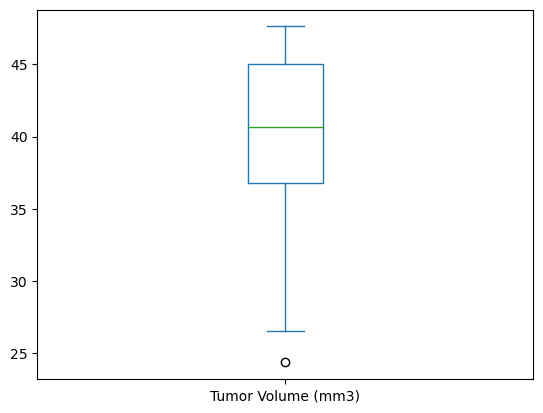

In [169]:
# Calculate upper and lower bounds RAMICANE
stats_Ramicane = DataRamicane2['Tumor Volume (mm3)'].describe()
stats_RamicaneQ1 = stats_Ramicane['25%']
stats_RamicaneQ3 = stats_Ramicane['75%']
stats_RamicaneIQR = stats_RamicaneQ3 - stats_RamicaneQ1
stats_RamicaneLowerBound = stats_RamicaneQ1 - (stats_RamicaneIQR*1.5)
stats_RamicaneUpperBound = stats_RamicaneQ3 + (stats_RamicaneIQR*1.5)

print(f'''

The lower quartile is: {stats_RamicaneQ1},
The upper quatile is: {stats_RamicaneQ3},
The IQR is: {stats_RamicaneIQR},
The lower bound is: {stats_RamicaneLowerBound},
The upper bound is: {stats_RamicaneUpperBound}

''')

FilteredRamicane = DataRamicane2[
    (DataRamicane2['Tumor Volume (mm3)']>stats_RamicaneLowerBound) & (DataRamicane2['Tumor Volume (mm3)']<stats_RamicaneUpperBound)
]
FilteredRamicane['Tumor Volume (mm3)'].plot.box()



The lower quartile is: 47.3123533,
The upper quatile is: 57.314443967500004,
The IQR is: 10.002090667500006,
The lower bound is: 32.309217298749985,
The upper bound is: 72.31757996875001




<AxesSubplot:>

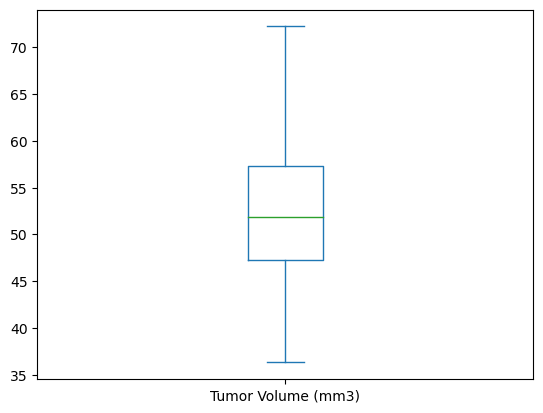

In [170]:
# Calculate upper and lower bounds INFUBINOL
stats_Infubinol = DataInfubinol2['Tumor Volume (mm3)'].describe()
stats_InfubinolQ1 = stats_Infubinol['25%']
stats_InfubinolQ3 = stats_Infubinol['75%']
stats_InfubinolIQR = stats_InfubinolQ3 - stats_InfubinolQ1
stats_InfubinolLowerBound = stats_InfubinolQ1 - (stats_InfubinolIQR*1.5)
stats_InfubinolUpperBound = stats_InfubinolQ3 + (stats_InfubinolIQR*1.5)

print(f'''

The lower quartile is: {stats_InfubinolQ1},
The upper quatile is: {stats_InfubinolQ3},
The IQR is: {stats_InfubinolIQR},
The lower bound is: {stats_InfubinolLowerBound},
The upper bound is: {stats_InfubinolUpperBound}

''')

FilteredInfubinol = DataInfubinol2[
    (DataInfubinol2['Tumor Volume (mm3)']>stats_InfubinolLowerBound) & (DataInfubinol2['Tumor Volume (mm3)']<stats_InfubinolUpperBound)
]
FilteredInfubinol['Tumor Volume (mm3)'].plot.box()



The lower quartile is: 47.2084271125,
The upper quatile is: 56.801437570000004,
The IQR is: 9.593010457500007,
The lower bound is: 32.81891142624998,
The upper bound is: 71.19095325625001




<AxesSubplot:>

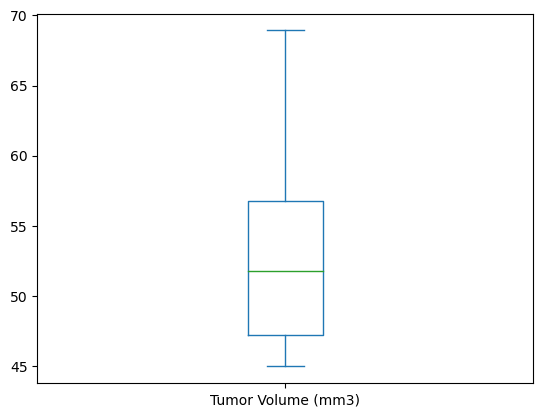

In [173]:
# Calculate upper and lower bounds CEFTAMIN
stats_Ceftamin = DataCeftamin2['Tumor Volume (mm3)'].describe()
stats_CeftaminQ1 = stats_Ceftamin['25%']
stats_CeftaminQ3 = stats_Ceftamin['75%']
stats_CeftaminIQR = stats_CeftaminQ3 - stats_CeftaminQ1
stats_CeftaminLowerBound = stats_CeftaminQ1 - (stats_CeftaminIQR*1.5)
stats_CeftaminUpperBound = stats_CeftaminQ3 + (stats_CeftaminIQR*1.5)

print(f'''

The lower quartile is: {stats_CeftaminQ1},
The upper quatile is: {stats_CeftaminQ3},
The IQR is: {stats_CeftaminIQR},
The lower bound is: {stats_CeftaminLowerBound},
The upper bound is: {stats_CeftaminUpperBound}

''')

FilteredCeftamin = DataCeftamin2[
    (DataCeftamin2['Tumor Volume (mm3)']>stats_CeftaminLowerBound) & (DataCeftamin2['Tumor Volume (mm3)']<stats_CeftaminUpperBound)
]
FilteredCeftamin['Tumor Volume (mm3)'].plot.box()

# Subset containing the 4 types of Drugs
sub_dataset = complete_data.loc[
    (complete_data['Drug Regimen'] == 'Capomulin') |
    (complete_data['Drug Regimen'] == 'Ramicane') |
    (complete_data['Drug Regimen'] == 'Infubinol') |
    (complete_data['Drug Regimen'] == 'Ceftamin') 
]
sub_dataset

# Subset containing the 4 types of Drugs, only Max tumor volume by Mouse ID and Drug Regimen
sub_datasetMAX = (
    sub_dataset
    .groupby(['Mouse ID' , 'Drug Regimen'])['Timepoint']
    .max()
)

# Transform into Pandas Data Frame
sub_datasetMAXdf = pd.DataFrame(sub_datasetMAX)
sub_datasetMAXdf = sub_datasetMAXdf.reset_index()
sub_datasetMAXdf

In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


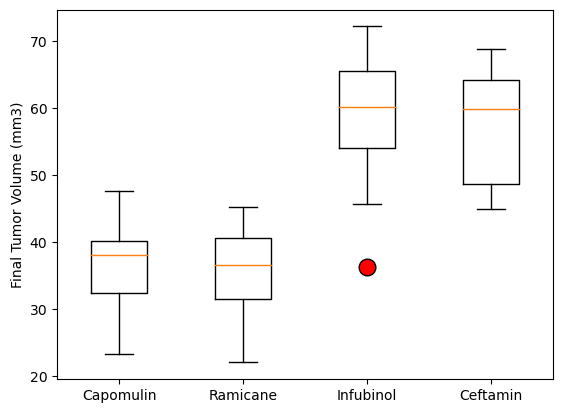

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

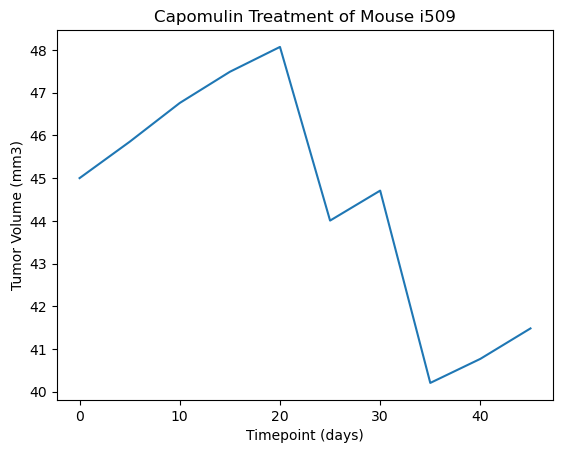

In [158]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Create the individual mouse data
CapomulinMouse = complete_data.loc[
    (complete_data['Drug Regimen'] == 'Capomulin') &
    (complete_data['Mouse ID'] == 'l509') 
]

x_values = CapomulinMouse['Timepoint']
y_values = CapomulinMouse['Tumor Volume (mm3)']

plt.plot(x_values, y_values)
plt.title('Capomulin Treatment of Mouse i509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

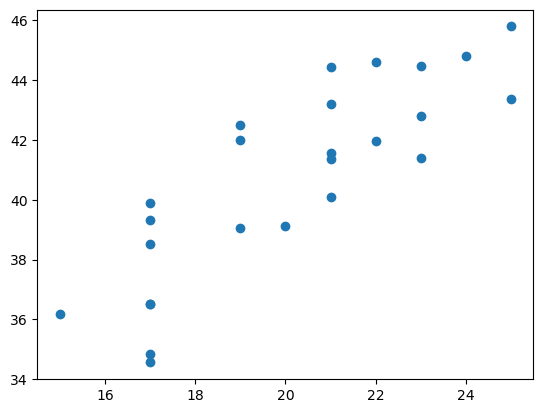

In [159]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
CapomulinTumorAverage = (
    complete_data
    .loc[complete_data['Drug Regimen'] == 'Capomulin']
    .groupby(['Mouse ID' , 'Weight (g)'])['Tumor Volume (mm3)']
    .mean()
)
CapomulinTumorAverage = pd.DataFrame(CapomulinTumorAverage).reset_index()

x_values = CapomulinTumorAverage['Weight (g)']
y_values = CapomulinTumorAverage['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.show()

## Correlation and Regression

In [128]:
import numpy as np

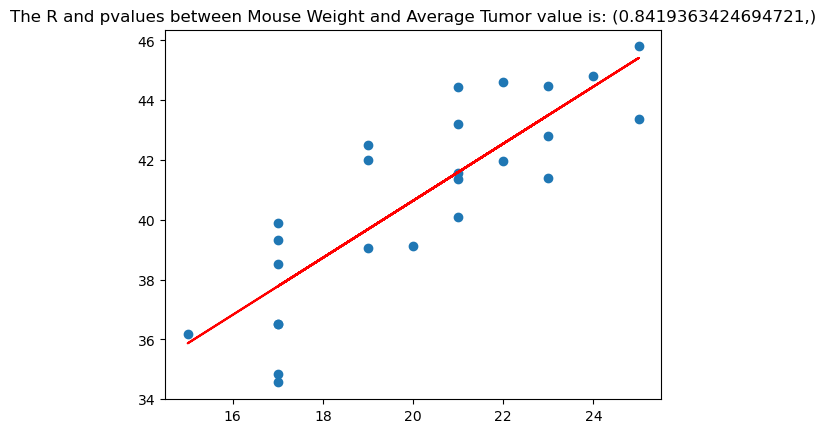

In [160]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = CapomulinTumorAverage['Weight (g)']
y_values = CapomulinTumorAverage['Tumor Volume (mm3)']
Corr_Value = st.pearsonr(x_values, y_values)

plt.scatter(x_values, y_values)
m,b = np.polyfit(x_values,y_values,deg=1)
plt.plot(x_values, m*x_values+b, color='r')
plt.title(f'The R and pvalues between Mouse Weight and Average Tumor value is: {Corr_Value[:1]}')
plt.show()